In [1]:
# Create actin network object and evolve over time.
from weichselSchwarz2 import *
from numpy import array
from numpy.random import normal

n = network(1, 7140, 75, 400, 2, 5.7, recordHistory = True)
n.evolve(2.7e-3, 20.0)

[ 7777.77777778  7777.77777778  7777.77777778 ...,  7592.59259259
  4259.25925926  3703.70370371]


Text(0,0.5,'Branching rate (/s)')

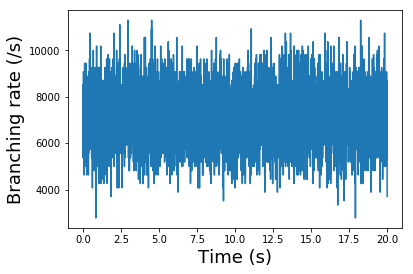

In [2]:
from numpy import linspace, gradient, mean
from matplotlib.pyplot import plot, xlabel, ylabel
%matplotlib inline

noBranches = array([b for a, b, c in n.noFilaments])
timeArr = linspace(0, n.tElapsed, len(noBranches))
gradTimeArr = gradient(timeArr)
networkVelArr = gradient(n.xEdge) / gradTimeArr
branchRateArr = gradient(noBranches) / gradTimeArr
print(branchRateArr)
plot(timeArr, branchRateArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Branching rate (/s)", fontsize = 18)

[ 29999.99999999  23148.14814814  16851.85185185 ...,   6666.66666666
   5555.55555556   5185.18518519]


Text(0,0.5,'Capping rate (/s)')

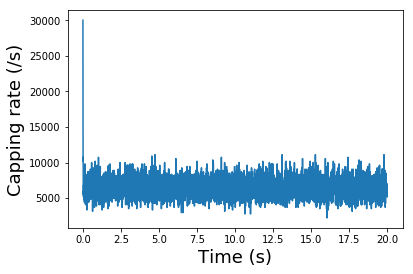

In [3]:
noCaps = array([c for a, b, c in n.noFilaments])
capRateArr = gradient(noCaps) / gradTimeArr
print(capRateArr)
plot(timeArr, capRateArr)
xlabel(r"Time (s)", fontsize = 18)
ylabel(r"Capping rate (/s)", fontsize = 18)

Text(0,0.5,'Estimated PDF')

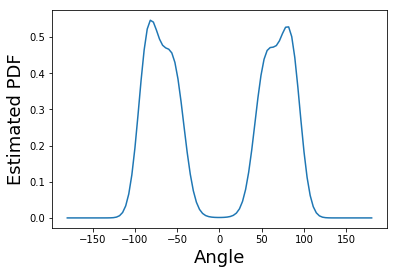

In [4]:
# Plot kernel density estimate of the distribution of orientations of the active filaments.
from numpy import flatnonzero
from scipy import stats

angles = n.getAngles()
kde = stats.gaussian_kde(angles)
x = linspace(-pi, pi, 100)
p = kde(x)
plot(x / pi * 180, p)
xlabel(r"Angle", fontsize = 18)
ylabel(r"Estimated PDF", fontsize = 18)